In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense , LSTM , Dropout

Using TensorFlow backend.


In [2]:
dataset = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [3]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [5]:
training_data = dataset.iloc[: , 1:2].values
training_data

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [6]:
sc = MinMaxScaler(feature_range = (0 , 1))
scaled_train_data = sc.fit_transform(training_data)
scaled_train_data

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [7]:
X_train = []
y_train = []

for i in range(60 , 1258):
    X_train.append(scaled_train_data[i - 60 : i , 0])
    y_train.append(scaled_train_data[i , 0])
    
    
X_train , y_train = np.array(X_train) , np.array(y_train)

In [8]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [9]:
X_train = np.reshape(X_train , (X_train.shape[0] , X_train.shape[1] , 1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [10]:
X_train.shape

(1198, 60, 1)

In [11]:
regressor = Sequential()

regressor.add(LSTM(units = 50 , return_sequences = True , input_shape = (X_train.shape[1] , 1)))
regressor.add(Dropout(0.2))

In [12]:
regressor.add(LSTM(units = 50 , return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50 , return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [13]:
regressor.add(Dense(units = 1))

In [14]:
regressor.compile(optimizer = 'adam' , loss = 'mean_squared_error')

In [15]:
regressor.fit(X_train , y_train , epochs = 50 , batch_size = 32)

Epoch 1/50
1198/1198 [==============================] - 26s 21ms/step - loss: 0.0406
Epoch 2/50
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0052
Epoch 3/50
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0053
Epoch 4/50
1198/1198 [==============================] - 24s 20ms/step - loss: 0.0049
Epoch 5/50
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0050
Epoch 6/50
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0047
Epoch 7/50
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0040
Epoch 8/50
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0039
Epoch 9/50
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0039
Epoch 10/50
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0039
Epoch 11/50
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0036
Epoch 12/50
1198/1198 [==============================] - 18s 15

In [16]:
real_stock_price = dataset_test.iloc[: , 1:2].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [18]:
total_dataset = pd.concat((dataset['Open'] , dataset_test['Open']) , axis = 0)
total_dataset

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [19]:
total_dataset.shape

(1278,)

In [21]:
inputs = total_dataset[len(total_dataset) - len(dataset_test) - 60:].values
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [23]:
inputs = inputs.reshape(-1 , 1)
inputs = sc.transform(inputs)
inputs

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [26]:
X_test = []

for i in range(60 , 80):
    X_test.append(inputs[i - 60 : i , 0])
    
X_test= np.array(X_test)
X_test = np.reshape(X_test , (X_test.shape[0] , X_test.shape[1] , 1))

In [28]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[798.26306],
       [797.8328 ],
       [796.9719 ],
       [795.845  ],
       [794.6948 ],
       [793.83295],
       [793.4966 ],
       [793.76874],
       [794.6359 ],
       [796.00543],
       [797.7314 ],
       [799.6375 ],
       [801.5511 ],
       [803.3494 ],
       [804.9534 ],
       [806.46686],
       [808.06976],
       [809.9676 ],
       [812.23517],
       [814.64026]], dtype=float32)

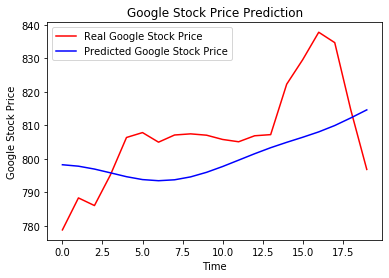

In [29]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()